<a href="https://colab.research.google.com/github/elijahmoon-hub/Elijah-s-repository/blob/main/ElijMoon_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

In [4]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

**Task1**:

Does elpd_loo mean anything if we only have one model?

elpd_loo only matters if we're comparing 2 or more models.

**Task2**:

Describe overfitting, in the context of this course

When the model uses too much of the observed data, this creates an overfitting error. With this, the model can't make completely accurate predictions.

**Task3**:

How do we mitigate overfitting?

We could use weak priors and less variables. Weakly informative priors constrain the effect the observed data has on model. Using fewer variables also constrains the model by not allowing it to adapt to the randomness in the observed data.

**Task4**:

How do we mitigate underfitting?

We can use elpd_loo to choose between models and the model with the highest elpd_loo will make the model as accurate as possible.:

**Task5**:

Why would we want more than one predictor in a model?

We might want more than one predictor in a model if there are multiple factors that affect the response.

**Task6**:

Can we have too many predictors? How would we know?

We can have too many predictors as this leads to overtfitting where the model can't make the best predictions.  If the model predicts test data outside the observed data, there's overfitting.

**Task7**:

What is variable selection, and how does it work?

Variable selection is how we choose useful predictors that  work for our model. It creates various models with different combinations of predictors and comparing their elpd_loos with each other to figure out which one is best.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

In a linear regression with two predictors, adding the variables in the model creates a model with multiple intercepts and a common slope.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We can visualize multiple linear regression models by creating multiple plots and making  it 3D. It's not possible to visualize the entire model of 3+ predictor models all at once because it's limited to 3D. Causal diagrams can also be used to visualize multiple linear regression models.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [5]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [6]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

In [ ]:
model_basketball = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
#fit the model
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

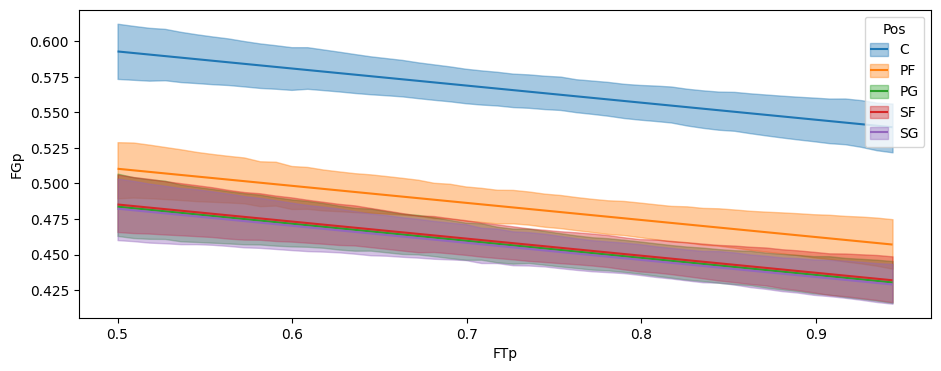

In [11]:
#plot 94% HDIs of the means of each position
bmb.interpret.plot_predictions(model_basketball,
                               idata_basketball,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})


In [ ]:
#define the model, but as a hierarchy
model_basketball_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
#create model
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})
bmb.interpret.plot_predictions(model_basketball_h,
                               idata_basketball_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
#define the model; bb_interq stands for baskeball interaction quantiative
model_bb_interq = bmb.Model("`FGp` ~ `FTp` + `Pos` + `FTp`:`Pos`", data=bb)
#create the model
idata_bb_interq = model_bb_interq.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

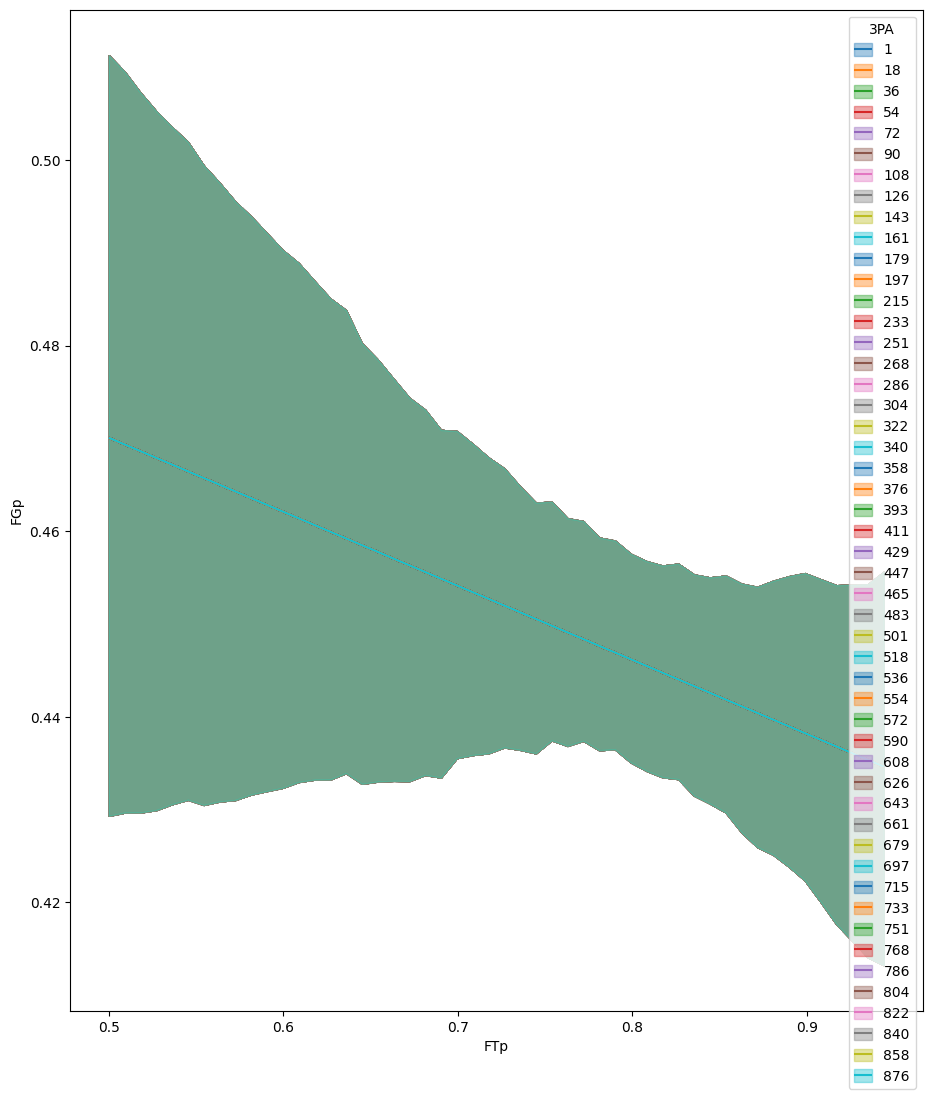

In [14]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

In [ ]:

model_bb_5 = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `3PA` : `Pos`", data=bb)
#create the model
idata_bb_5 = model_bb_5.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

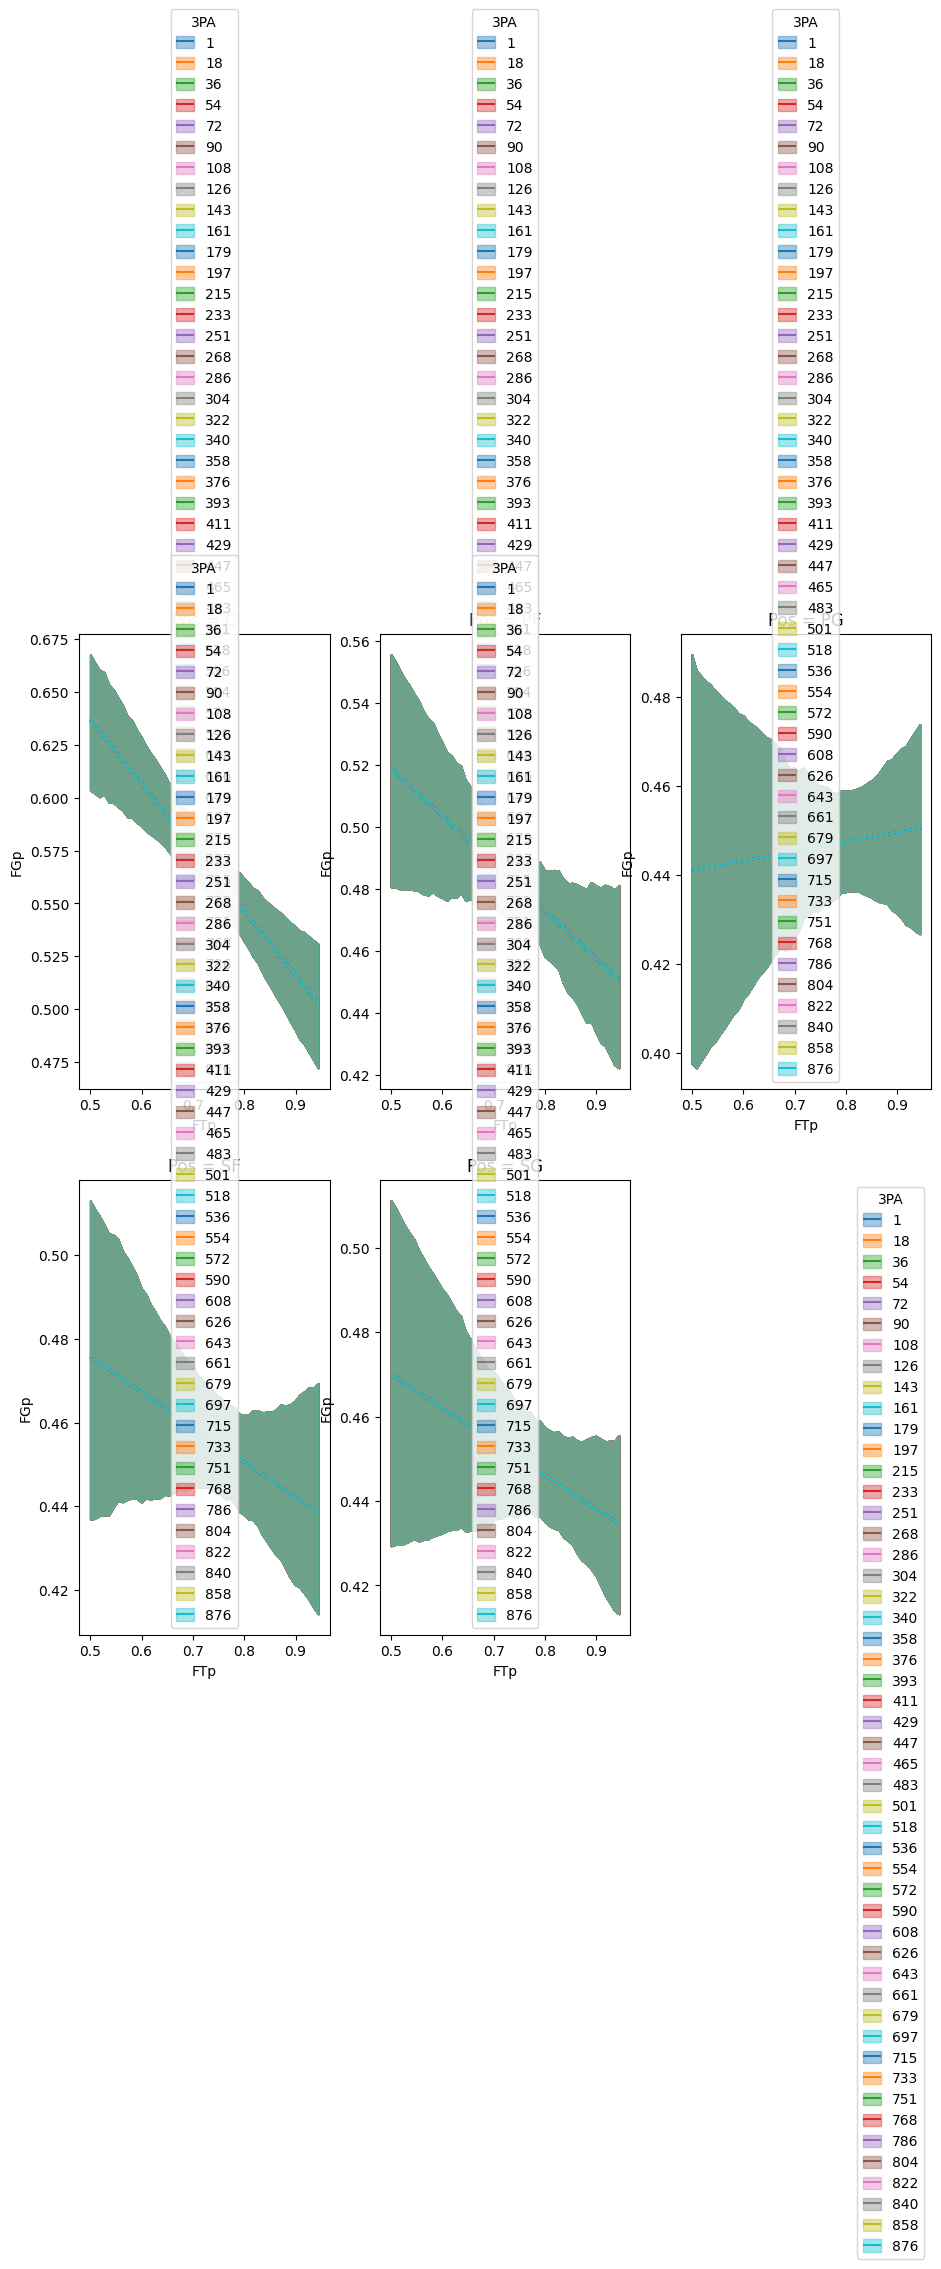

In [16]:
bmb.interpret.plot_predictions(model_bb_interq,
                               idata_bb_interq,
                               ["FTp","3PA","Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

In [ ]:
model_bb_4 = bmb.Model("`FGp` ~ `FTp` * `Pos` * `3PA`", data=bb)
idata_bb_4 = model_bb_4.fit(idata_kwargs={'log_likelihood': True})
cmp = az.compare({"1":idata_basketball,"2":idata_basketball_h, "3":idata_bb_interq, "4":idata_bb_4, "5": idata_bb_5})
az.plot_compare(cmp)

According to the elpd_loo model, model #4 is the most accurate.

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [9]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [10]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


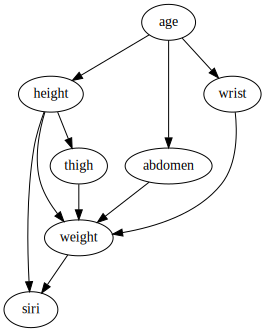

In [27]:
b_dag = gv.Digraph(name="Body Data")

b_dag.node('S','siri')
b_dag.node('A','age')
b_dag.node('W','weight')
b_dag.node('H','height')
b_dag.node('Ab','abdomen')
b_dag.node('T','thigh')
b_dag.node('Wr','wrist')

b_dag.edges([('A','H'),('A','Ab'),('A','Wr'),('H','T'),('H','W'),('Wr','W'),('W','S'),('T','W'),('H','S'),('Ab','W')])

b_dag

I'm trying to predict  body fat percentage (siri) as this would be  easiest with the variavles given. I think that it is the  most consistant from person to person, given varibales like height, weight, abdomen, wrist size. Body fat percentage is an important statisitic for people, especially those with fitness goals who are trying to achieve a certain physique or fitness level. It's also commonly calculated using metrics like these, and I think the final prediction will be accurate.